# A tour of PyCIEMSS interfaces and functionality

### Load dependencies and interfaces

In [1]:
import os
import pyciemss
import torch
import pandas as pd

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

smoke_test = ('CI' in os.environ)

### Select models and data

In [2]:
MODEL_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/models/"
DATA_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/datasets/"

model1 = os.path.join(MODEL_PATH, "SEIRHD_NPI_Type1_petrinet.json")
model2 = os.path.join(MODEL_PATH, "SEIRHD_NPI_Type2_petrinet.json")
model3 = os.path.join(MODEL_PATH, "SIR_stockflow.json")

dataset1 = os.path.join(DATA_PATH, "SIR_data_case_hosp.csv")
dataset2 = os.path.join(DATA_PATH, "traditional.csv")

### Set parameters for sampling

In [3]:
start_time = 0.0
end_time = 100.0
logging_step_size = 10.0
num_samples = 3 if smoke_test else 10

## Sample interface
Take `num_samples` number of samples from the (prior) distribution invoked by the chosen model.

### Sample from model 1

,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,10.0,0.432283,0.421057,0.32912,0.10079,0.081584,4.350661,0.260838,36.652344,3.030986,24.959702,58.501820,19339918.0,24.959702,36.652344,3.030986,0.260838
1,1,0,20.0,0.432283,0.421057,0.32912,0.10079,0.081584,4.350661,0.918898,53.169876,5.008731,36.277908,155.516907,19339790.0,36.277908,53.169876,5.008731,0.918898
2,2,0,30.0,0.432283,0.421057,0.32912,0.10079,0.081584,4.350661,1.917361,77.195602,7.354787,52.670864,296.874664,19339578.0,52.670864,77.195602,7.354787,1.917361
3,3,0,40.0,0.432283,0.421057,0.32912,0.10079,0.081584,4.350661,3.372824,112.075180,10.689271,76.470001,502.171204,19339336.0,76.470001,112.075180,10.689271,3.372824
4,4,0,50.0,0.432283,0.421057,0.32912,0.10079,0.081584,4.350661,5.486716,162.710266,15.520458,111.019753,800.235596,19338946.0,111.019753,162.710266,15.520458,5.486716


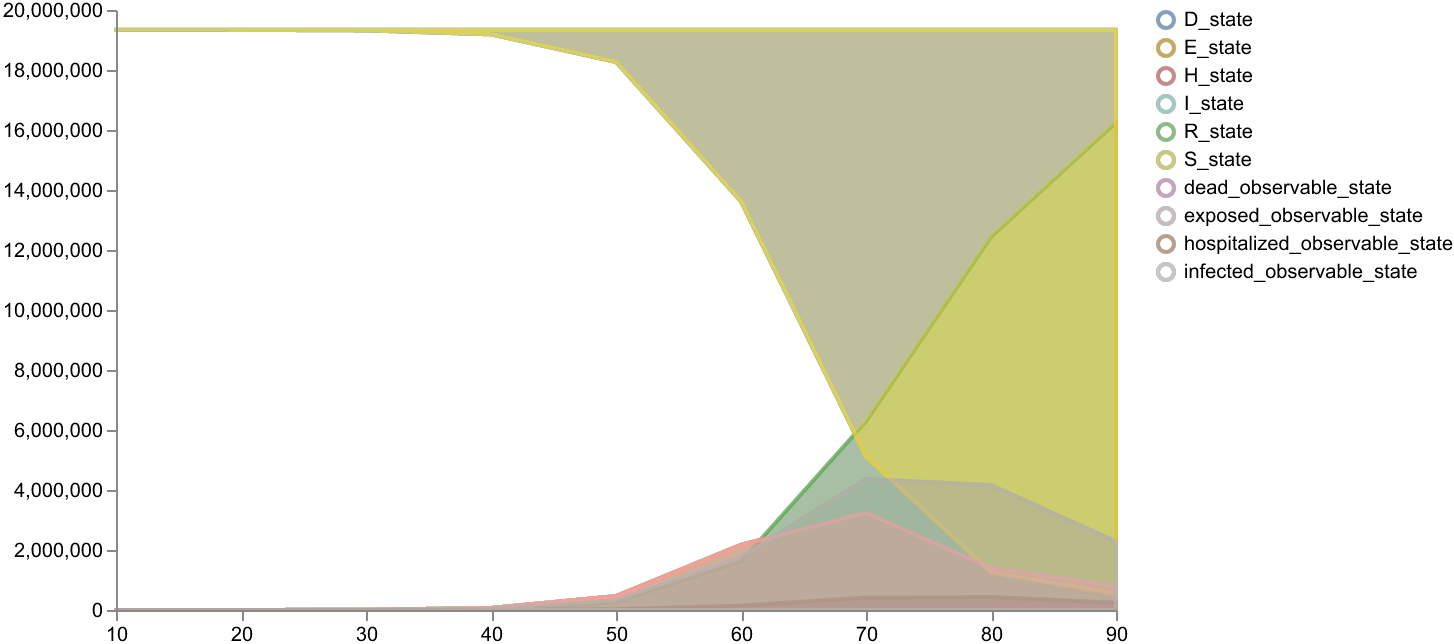

In [4]:
result1 = pyciemss.sample(model1, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

# Plot results for all states
schema = plots.trajectories(result1["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

### Sample from model 2

,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_beta_nc_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,10.0,0.744773,0.108939,0.413371,0.357748,0.037651,0.025175,8.442767,0.035053,35.760227,1.228337,23.504341,68.341110,19339914.0,23.504341,35.760227,1.228337,0.035053
1,1,0,20.0,0.744773,0.108939,0.413371,0.357748,0.037651,0.025175,8.442767,0.111110,44.568432,1.752313,29.334770,161.898041,19339804.0,29.334770,44.568432,1.752313,0.111110
2,2,0,30.0,0.744773,0.108939,0.413371,0.357748,0.037651,0.025175,8.442767,0.210767,55.577999,2.215137,36.581356,278.766449,19339654.0,36.581356,55.577999,2.215137,0.210767
3,3,0,40.0,0.744773,0.108939,0.413371,0.357748,0.037651,0.025175,8.442767,0.335693,69.306381,2.766375,45.617485,424.529205,19339500.0,45.617485,69.306381,2.766375,0.335693
4,4,0,50.0,0.744773,0.108939,0.413371,0.357748,0.037651,0.025175,8.442767,0.491567,86.424286,3.450234,56.884880,606.298401,19339290.0,56.884880,86.424286,3.450234,0.491567


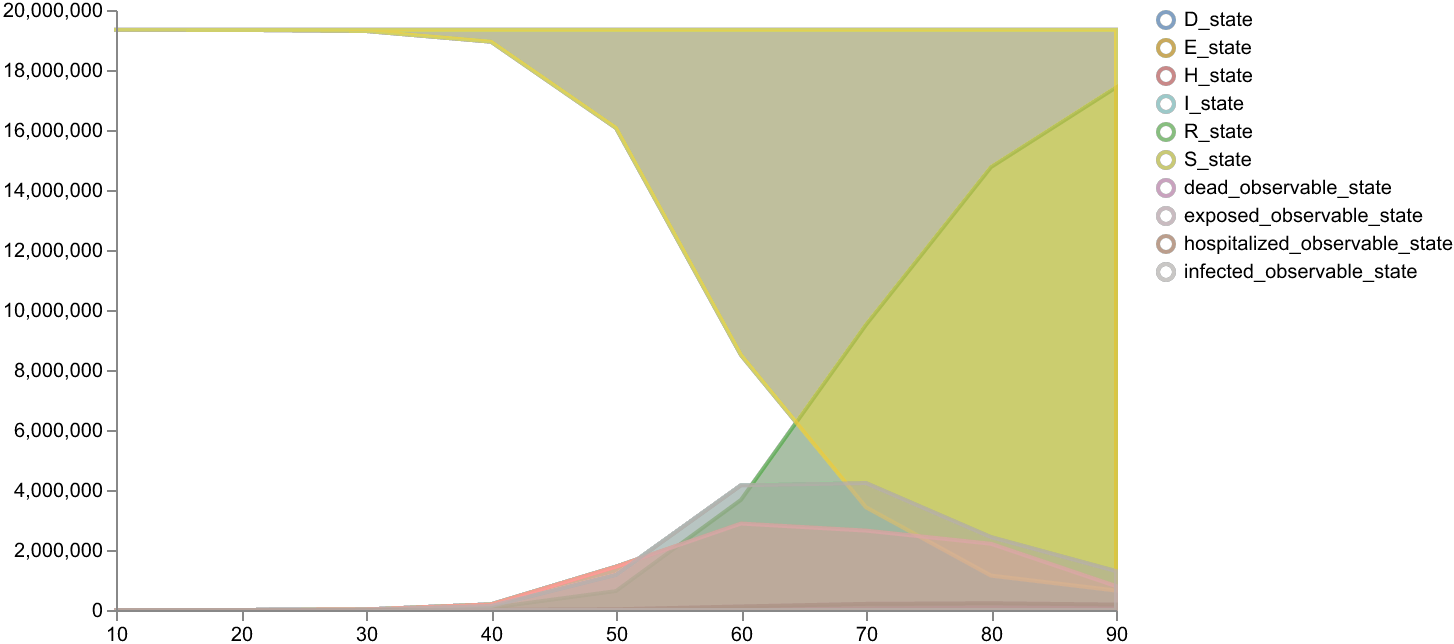

In [5]:
result2 = pyciemss.sample(model2, end_time, logging_step_size, num_samples, start_time=start_time)
display(result2['data'].head())

# Plot the result
schema = plots.trajectories(pd.DataFrame(result2["data"]), keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Ensemble Sample Interface
Sample from an ensemble of model 1 and model 2 

,timepoint_id,sample_id,timepoint_unknown,model_0/weight_param,model_1/weight_param,model_0/persistent_beta_c_param,model_0/persistent_kappa_param,model_0/persistent_gamma_param,model_0/persistent_hosp_param,model_0/persistent_death_hosp_param,...,D_state,E_state,H_state,I_state,R_state,S_state,infected_state,exposed_state,hospitalized_state,dead_state
0,0,0,10.0,0.206927,0.793073,0.309072,0.212308,0.318814,0.014409,0.022174,...,0.134437,149.730713,3.861641,85.990303,93.982559,19339698.0,85.990303,149.730713,3.861641,0.134437
1,1,0,20.0,0.206927,0.793073,0.309072,0.212308,0.318814,0.014409,0.022174,...,1.293888,1055.595337,28.109907,598.003174,711.918945,19337674.0,598.003174,1055.595337,28.109907,1.293888
2,2,0,30.0,0.206927,0.793073,0.309072,0.212308,0.318814,0.014409,0.022174,...,9.661891,7587.138672,202.278030,4294.684082,5110.711914,19322840.0,4294.684082,7587.138672,202.278030,9.661891
3,3,0,40.0,0.206927,0.793073,0.309072,0.212308,0.318814,0.014409,0.022174,...,69.840424,54192.261719,1452.011597,30760.082031,36680.031250,19216892.0,30760.082031,54192.261719,1452.011597,69.840424
4,4,0,50.0,0.206927,0.793073,0.309072,0.212308,0.318814,0.014409,0.022174,...,496.273224,366016.187500,10156.330078,211963.937500,258540.687500,18492876.0,211963.937500,366016.187500,10156.330078,496.273224


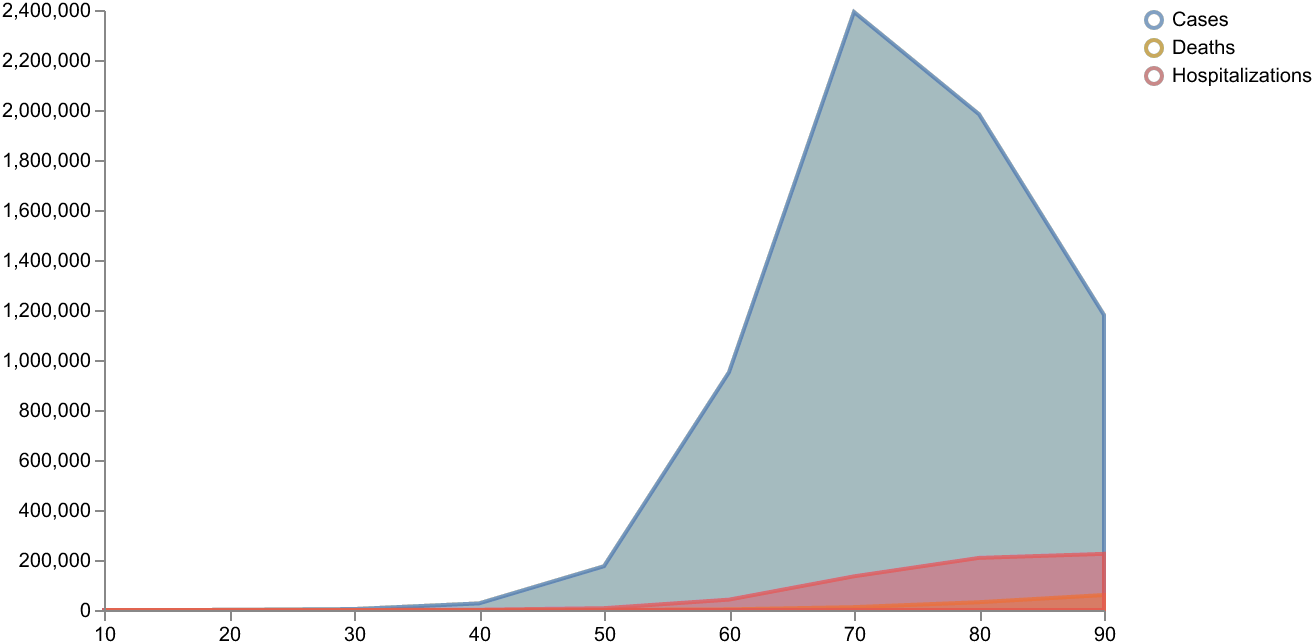

In [6]:
model_paths = [model1, model2]
solution_mappings = [lambda x : x, lambda x : x] # Conveniently, these two models operate on exactly the same state space, with the same names.

ensemble_result = pyciemss.ensemble_sample(model_paths, solution_mappings, end_time, logging_step_size, num_samples, start_time=start_time)
display(ensemble_result['data'].head())

# Plot the ensemble result for cases, hospitalizations, and deaths
nice_labels={"dead_state": "Deaths", 
                 "hospitalized_state": "Hospitalizations",
                 "infected_state": "Cases"
                }
schema = plots.trajectories(ensemble_result["data"], 
                           keep=["infected_state", "hospitalized_state", "dead_state"], 
                           relabel=nice_labels,
                          )
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Calibrate interface
Calibrate a model to a dataset by mapping model state varibales or observables to columns in the dataset. The `data_mapping` must be a dictionary where the keys are column names in the dataset, and the values are the state variables or observables they are mapped to (as in, `data_mapping = {"column_name": "observable/state_variable"}`).

In [7]:
data_mapping = {"case": "infected", "hosp": "hospitalized"} # data is mapped to observables
# data_mapping = {"case": "I", "hosp": "H"} # data is mapped to state variables

num_iterations = 10 if smoke_test else 1000
calibrated_results = pyciemss.calibrate(model1, dataset1, data_mapping=data_mapping, num_iterations=num_iterations)
parameter_estimates = calibrated_results["inferred_parameters"]
calibrated_results

/Users/sam-basis/Desktop/Research/pyciemss/pyciemss/integration_utils/observation.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data_df.applymap(lambda x: isinstance(x, (int, float))).all().all():


Data printout: This dataset contains 2 rows of data. The first column, Timestamp, begins at 1.1 and ends at 3.3. The subsequent columns are named: case, hosp


{'inferred_parameters': AutoGuideList(
   (0): AutoDelta()
   (1): AutoLowRankMultivariateNormal()
 ),
 'loss': 197.45514914393425}

In [8]:
parameter_estimates()

{'persistent_beta_c': tensor(0.1918, grad_fn=<ExpandBackward0>),
 'persistent_kappa': tensor(0.5731, grad_fn=<ExpandBackward0>),
 'persistent_gamma': tensor(0.3252, grad_fn=<ExpandBackward0>),
 'persistent_hosp': tensor(0.1347, grad_fn=<ExpandBackward0>),
 'persistent_death_hosp': tensor(0.0299, grad_fn=<ExpandBackward0>),
 'persistent_I0': tensor(5.1130, grad_fn=<ExpandBackward0>)}

### Use calibrated parameter estimates in `sample` to sample from the calibrated model (posterior distr.)

,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,10.0,0.319491,0.464972,0.312418,0.123922,0.013471,4.610448,0.055032,46.028965,4.080992,30.759375,61.762188,19339904.0,30.759375,46.028965,4.080992,0.055032
1,1,0,20.0,0.319491,0.464972,0.312418,0.123922,0.013471,4.610448,0.218939,84.793648,8.346473,56.744385,189.938812,19339708.0,56.744385,84.793648,8.346473,0.218939
2,2,0,30.0,0.319491,0.464972,0.312418,0.123922,0.013471,4.610448,0.530700,156.300827,15.497387,104.598381,426.936554,19339344.0,104.598381,156.300827,15.497387,0.530700
3,3,0,40.0,0.319491,0.464972,0.312418,0.123922,0.013471,4.610448,1.106678,288.097473,28.581205,192.801056,863.887573,19338672.0,192.801056,288.097473,28.581205,1.106678
4,4,0,50.0,0.319491,0.464972,0.312418,0.123922,0.013471,4.610448,2.168512,530.982727,52.682064,355.354309,1669.282227,19337442.0,355.354309,530.982727,52.682064,2.168512


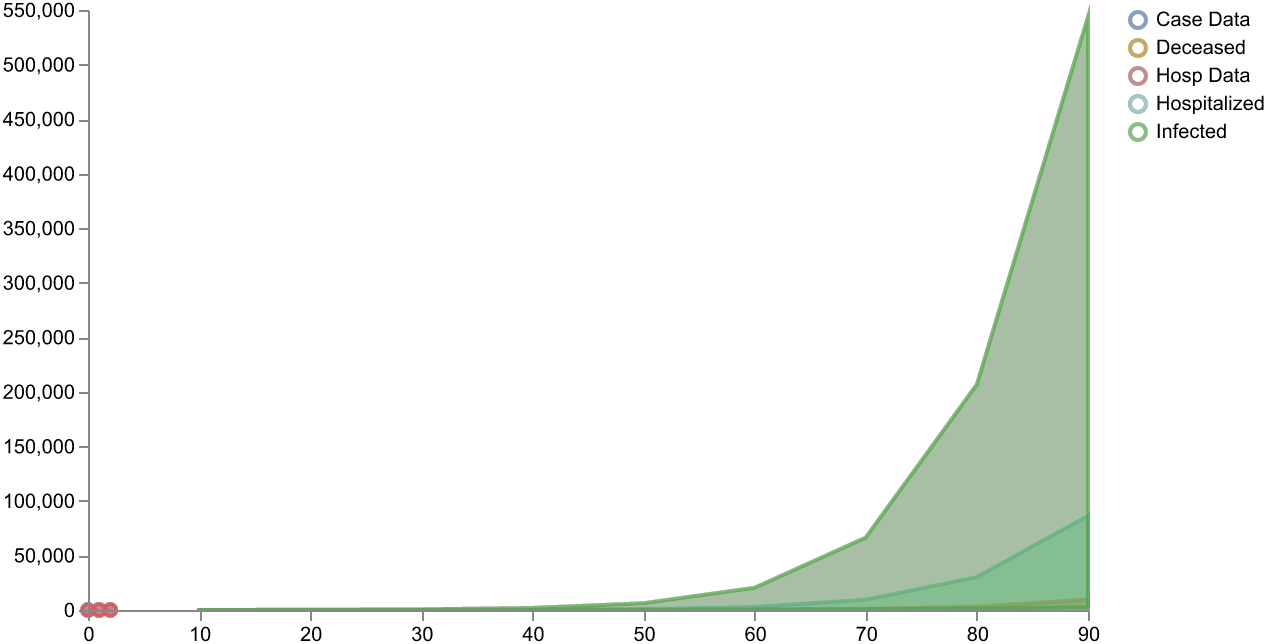

In [9]:
calibrated_sample_results = pyciemss.sample(model1, end_time, logging_step_size, num_samples, 
                start_time=start_time, inferred_parameters=parameter_estimates)
display(calibrated_sample_results["data"].head())

# Plot the result
nice_labels = {
        "dead_observable_state": "Deceased", 
        "hospitalized_observable_state": "Hospitalized",
        "infected_observable_state": "Infected",
        }
nice_data_names = {
        "case": "Case Data",
        "hosp": "Hosp Data"
        }
data_df = pd.read_csv(dataset1)
data_df.rename(columns=nice_data_names, inplace=True)
schema = plots.trajectories(pd.DataFrame(calibrated_sample_results["data"]), 
                           keep=["infected_observable_state", "hospitalized_observable_state", "dead_observable_state"], 
                           relabel=nice_labels,
                           points=data_df.drop(columns=['Timestamp']).reset_index(drop=True)
                           )

plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Sample interface with static parameter intervention
Change the value of the parameter `p_cbeta` to 0.5 on day 1

,timepoint_id,sample_id,timepoint_unknown,persistent_p_cbeta_param,persistent_p_tr_param,I_state,R_state,S_state
0,0,0,1.0,0.5,18.113844,1.255983,0.062005,999.683899
1,1,0,2.0,0.5,18.113844,1.957900,0.149292,998.894714
2,2,0,3.0,0.5,18.113844,3.050571,0.285326,997.666199
3,3,0,4.0,0.5,18.113844,4.749389,0.497199,995.755615
4,4,0,5.0,0.5,18.113844,7.385386,0.826862,992.789734


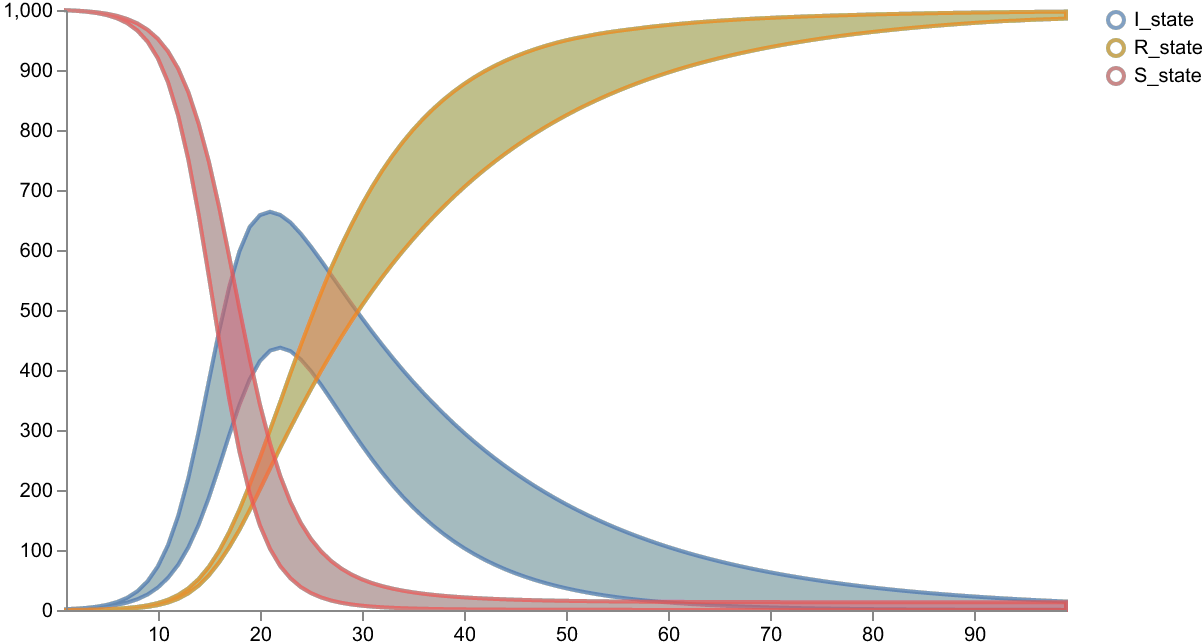

In [10]:
start_time = 0.0
end_time = 100.0
logging_step_size = 1.0
num_samples = 5 if smoke_test else 100

result = pyciemss.sample(model3, end_time, logging_step_size, num_samples, start_time=start_time, 
                         static_parameter_interventions={torch.tensor(1.): {"p_cbeta": torch.tensor(0.5)}})
display(result["data"].head())

# Plot the result
schema = plots.trajectories(pd.DataFrame(result["data"]), keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Sample interface with static state intervention
Change the Infected state `I` to 20.0 on day 5

,timepoint_id,sample_id,timepoint_unknown,persistent_p_cbeta_param,persistent_p_tr_param,I_state,R_state,S_state
0,0,0,1.0,0.336181,17.469685,1.321201,0.066010,999.612793
1,1,0,2.0,0.336181,17.469685,1.745310,0.153215,999.101379
2,2,0,3.0,0.336181,17.469685,2.305104,0.268402,998.426392
3,3,0,4.0,0.336181,17.469685,3.043651,0.420515,997.535767
4,4,0,5.0,0.336181,17.469685,4.017441,0.621329,996.361084


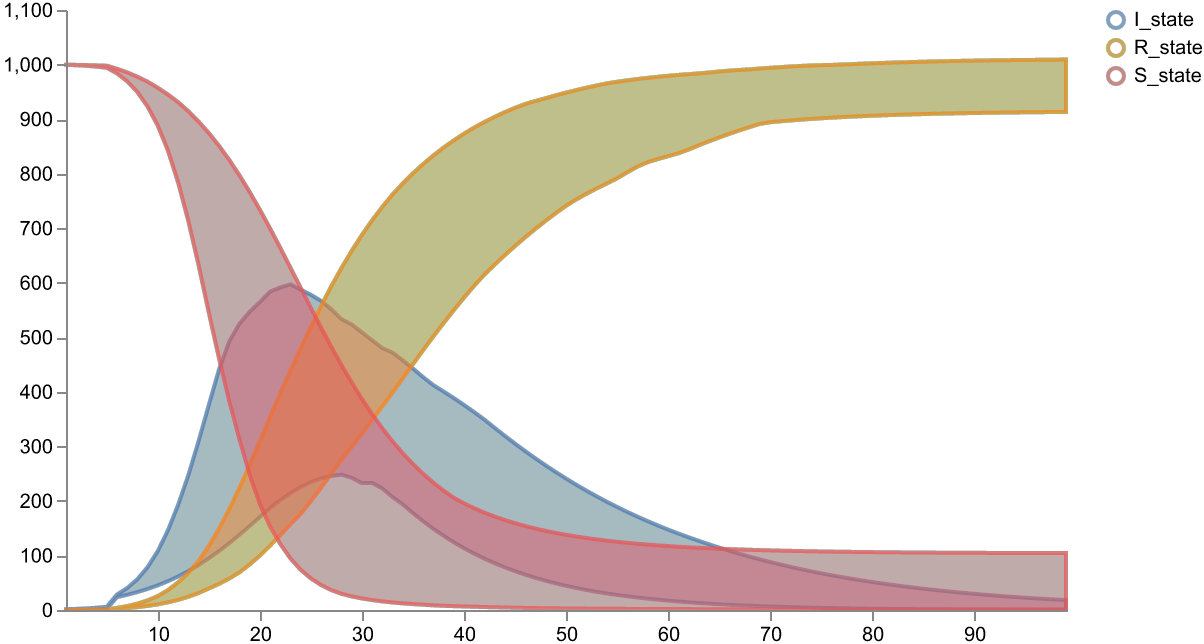

In [11]:
result = pyciemss.sample(model3, end_time, logging_step_size, num_samples, start_time=start_time, 
                         static_state_interventions={torch.tensor(5.): {"I": torch.tensor(20.0)}}, solver_method="dopri5")
display(result["data"].head())

# Plot the result
schema = plots.trajectories(pd.DataFrame(result["data"]), keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Sample interface with dynamic parameter interventions
Change the parameter `p_cbeta` from 0.35 to 0.3 when the infectious population `I` exceeds 400.

In [12]:
# Define the threshold for when the intervention should be applied
def make_var_threshold(var: str, threshold: torch.Tensor):
    def var_threshold(time, state):
        return state[var] - threshold
    return var_threshold
    
infection_threshold = make_var_threshold("I", torch.tensor(200.0))
dynamic_parameter_interventions1 = {infection_threshold: {"p_cbeta": torch.tensor(0.3)}}

result = pyciemss.sample(model3, end_time, logging_step_size, num_samples, start_time=start_time, 
                         dynamic_parameter_interventions=dynamic_parameter_interventions1, 
                         solver_method="dopri5")
display(result["data"].head())

# Plot the result
schema = plots.trajectories(pd.DataFrame(result["data"]), keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

ERROR:root:
                ###############################

                There was an exception in pyciemss

                Error occured in function: sample

                Function docs : 
    Load a model from a file, compile it into a probabilistic program, and sample from it.

    Args:
        model_path_or_json: Union[str, Dict]
            - A path to a AMR model file or JSON containing a model in AMR form.
        end_time: float
            - The end time of the sampled simulation.
        logging_step_size: float
            - The step size to use for logging the trajectory.
        num_samples: int
            - The number of samples to draw from the model.
        solver_method: str
            - The method to use for solving the ODE. See torchdiffeq's `odeint` method for more details.
            - If performance is incredibly slow, we suggest using `euler` to debug.
              If using `euler` results in faster simulation, the issue is likely that the model is s

KeyError: 'parameter_intervention_value_p_cbeta_0'

In [ ]:
# # NOTE: If you change the solver to "euler", you need to specify the step size in `solver_options` as below:
# # Specify solver options including the step_size
# solver_options = {"step_size": 1e-2}  # Example step size, adjust as needed
# result = pyciemss.sample(model3, end_time, logging_step_size, num_samples, start_time=start_time, 
#                          dynamic_parameter_interventions=dynamic_parameter_interventions1, 
#                          solver_method="euler",
#                          solver_options=solver_options)

## Sample interface with dynamic state interventions
Reduce the susceptible population `S` to 200.0 when infections `I` exceed 400. 

,timepoint_id,sample_id,timepoint_unknown,persistent_p_cbeta_param,persistent_p_tr_param,I_state,R_state,S_state
0,0,0,1.0,0.254645,17.540985,1.218166,0.063024,999.718872
1,1,0,2.0,0.254645,17.540985,1.483813,0.139795,999.375183
2,2,0,3.0,0.254645,17.540985,1.807211,0.233302,998.959534
3,3,0,4.0,0.254645,17.540985,2.200841,0.347183,998.452332
4,4,0,5.0,0.254645,17.540985,2.679815,0.485859,997.835815


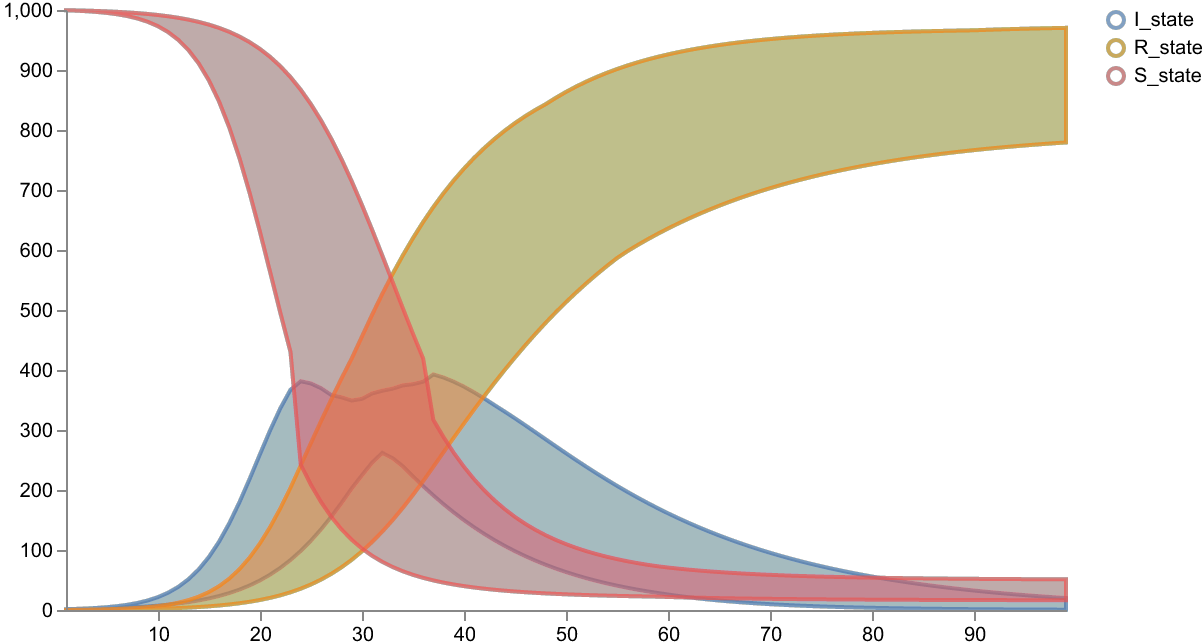

In [ ]:
# Define the threshold for when the intervention should be applied
def make_var_threshold(var: str, threshold: torch.Tensor):
    def var_threshold(time, state):
        return state[var] - threshold  
    return var_threshold
    
infection_threshold = make_var_threshold("I", torch.tensor(400.0))
dynamic_state_interventions1 = {infection_threshold: {"S": torch.tensor(200.0)}} 

result = pyciemss.sample(model3, end_time, logging_step_size, num_samples, start_time=start_time, 
                         dynamic_state_interventions=dynamic_state_interventions1, 
                         solver_method="dopri5")
display(result["data"].head())

# Plot the result
schema = plots.trajectories(pd.DataFrame(result["data"]), keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Optimize interface
Get infections below 300 individuals at 100 days for SIR model with minimum change to current value for intervention parameter

In [ ]:
import numpy as np
from typing import Dict, List

def obs_nday_average_qoi(
    samples: Dict[str, torch.Tensor], contexts: List, ndays: int = 7
) -> np.ndarray:
    """
    Return estimate of last n-day average of each sample.
    samples is is the output from a Pyro Predictive object.
    samples[VARIABLE] is expected to have dimension (nreplicates, ntimepoints)
    Note: last ndays timepoints is assumed to represent last n-days of simulation.
    """
    dataQoI = samples[contexts[0]].detach().numpy()

    return np.mean(dataQoI[:, -ndays:], axis=1)

start_time = 0.0
end_time = 40.
logging_step_size = 1.0
observed_params = ["I_state"]
intervention_time = torch.tensor(1.)
intervened_params = "p_cbeta"
p_cbeta_current = 0.35
initial_guess_interventions = 0.15
bounds_interventions = [[0.1], [0.5]]

risk_bound = 300.
qoi = lambda x: obs_nday_average_qoi(x, observed_params, 1)
objfun = lambda x: np.abs(p_cbeta_current-x)
static_parameter_interventions = {intervention_time: intervened_params}

opt_result = pyciemss.optimize(model3, end_time, logging_step_size, qoi, risk_bound, static_parameter_interventions, objfun, 
                               initial_guess_interventions=initial_guess_interventions, bounds_interventions=bounds_interventions, 
                               start_time=0.0, n_samples_ouu=int(1e2), maxiter=1, maxfeval=20, solver_method="euler")
print(f'Optimal policy for intervening on {static_parameter_interventions[list(static_parameter_interventions.keys())[0]]} is ', opt_result["policy"])

TypeError: 'dict' object is not callable

#### Sample using optimal policy as intervention

In [ ]:
num_samples = 10 if smoke_test else 100
result = pyciemss.sample(model3, end_time, logging_step_size, num_samples, start_time=start_time, 
                         static_parameter_interventions={intervention_time: {intervened_params: opt_result["policy"]}}, 
                         solver_method="euler")
display(result["data"].head())

# Plot the result
schema = plots.trajectories(pd.DataFrame(result["data"]), keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)